## Escolhendo o Dataset: Dicas para uma Análise Exploratória Mais Rica

A escolha do dataset é um passo fundamental para uma análise exploratória de dados (EDA) eficaz e interessante. É verdade que datasets como o do Titanic e Pokémon são muito populares e servem como excelentes exemplos introdutórios, mas explorar novos horizontes pode render insights mais originais e desafiadores.

**Por que evitar os datasets mais populares?**

* **Super análise:** Datasets muito explorados já tiveram suas principais características e padrões amplamente descritos.
* **Falta de originalidade:** Análises repetidas podem não agregar muito valor à comunidade de data science.
* **Limitação de aprendizado:** Ao focar em datasets mais simples, você pode perder a oportunidade de desenvolver habilidades para lidar com dados mais complexos e desafiadores.

**Dicas para escolher um dataset:**

* **Buscar por datasets brasileiros:** Plataformas como o Kaggle oferecem uma variedade de datasets sobre temas brasileiros, como economia, saúde, meio ambiente, etc. Ao explorar dados locais, você pode contribuir para a compreensão de problemas e desafios específicos do nosso país.
* **Priorizar datasets menos conhecidos:** Procure por datasets que tenham menos visualizações e downloads no Kaggle. Isso indica que eles são menos explorados e podem oferecer insights mais originais.
* **Considerar o tamanho e a complexidade do dataset:** Datasets muito pequenos podem limitar a profundidade da análise, enquanto datasets muito grandes podem demandar maior poder computacional. O ideal é encontrar um equilíbrio entre o tamanho e a complexidade do dataset.
* **Analisar a documentação do dataset:** Leia atentamente a descrição do dataset para entender a origem dos dados, as variáveis disponíveis e o objetivo da coleta.

**Superando o desafio de ter poucos dados:**

É comum se sentir preso em uma análise exploratória quando o dataset possui poucas colunas. Para superar esse desafio, você pode:

* **Criar novas variáveis:** Combine as variáveis existentes para criar novas features que possam ser mais informativas.
* **Explorar visualizações diferentes:** Utilize diferentes tipos de gráficos (histogramas, boxplots, scatter plots, etc.) para visualizar os dados sob diferentes perspectivas.
* **Realizar análise de correlação:** Verifique se existe alguma relação entre as variáveis numéricas.
* **Comparar com outros datasets:** Se possível, compare os seus dados com outros datasets semelhantes para identificar padrões e diferenças.
* **Buscar dados externos:** Complemente o seu dataset com dados de outras fontes para enriquecer a análise.

**Em resumo:**



Antes de começar a análise exploratória, o mais importante é escolher um dataset para trabalhar. O crucial, é escolher datasets menos populares, como o do Titanic e o do Pokémon, pois é algo que todo mundo já faz. É melhor priorizar dataset não tão populares, buscar no kangle datasets com nome "Brazil" pode te abrir uma infinidade de possibilidade, assim como base de dados brasileiros abertas ao público. 

A maior dificuldade é fazer apenas 3-4 gráficos e travar na evolução da análise exploratório, isso é muito comum quando se tem poucas colunas de dados.


## Análise exploratória na prática ##
 Em ambiente de trabalho, gesto normamente encarrega de dizer qual o objetivo da análise e o que você deve procurar. Mas uma boa prática é:

 * **1** Você começar explorando os dados, fazendo descobertas e só depois você organizaria o jupyter de forma que o storytelling fique legal e coerente.
 * **2** Você bolar algumas hipóteses ou perguntas a serem exploradas e já iniciar a análise atrás delas.

A primeira permite que você explore melhor os dados, mas dificulta depois na hora de montar um storytelling dos dados, organizando de forma coesa. 

Já a segunda, apesar de facilitar na hora de apresentar esses dados, pode acabar limitando a exploração de dados porque justamente está muito fechado nas hipóteses.

Mas de toda forma, é sempre bom partir de algumas perguntas pré-estabelecidas.

Olhando para os dados, conseguimos nos fazer algumas perguntas básicas:

- Quais os bairros mais caros de São Paulo?
- Quais os bairros com os maiores apartamentos?
- Existe correlação entre tamanho do apartamento e o seu preço? E entre o número de banheiros? E o número de vagas?
- Qual a característica de cada tipo de imóvel, em relação a preço, metragem, etc.?
- O que parece influenciar a diferença entre o aluguel e o custo total? Qual característica do imóvel?


## introdução ##

## o básico de todo notebook > bibliotecas ##

In [1]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configurar para não exibir Warnings
import warnings

warnings.filterwarnings('ignore')

# Configurar o estilo de gráfico do ggplot
plt.style.use('ggplot')

# Configurar para exibir até 15 linhas de um Dataframe do Pandas
pd.set_option ('display.max_rows', 15)

# Configurar para exibir todas as colunas de um Dataframe do Pandas
pd.set_option('display.max_columns', None)

# Configurar quebras e espaçamentos automáticas com nb_black
#%load_ext nb_black # essapoora deu errado, só desative.

## Hora de olhar os Dados ##

In [2]:
aptos = pd.read_csv('Data.csv')
aptos.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


Invés de usar o Shape, deixar uma mensagem para o usuário

In [3]:
print( f' O dataframe possui {aptos.shape[0]} linhas e {aptos.shape[1]} colunas')

 O dataframe possui 11657 linhas e 8 colunas


Não possui nenhum campo nulo, o tamanho da amostra é razoável tanto para criar boas inferências a respeito do padrão dos imóveis, quanto se quiser, futuramente, criar modelos preditivos

In [4]:
#separando variáveis númericas de não númericas
#numericas
numerics = ['int16, int32', 'int64', 'float16', 'float32', 'float64']
numericas = aptos.select_dtypes(include= numerics)

#não numericas
nao_numericas = aptos.select_dtypes( exclude = numerics)

print(
    f' Temos {numericas.shape[1]} colunas númericas e {nao_numericas.shape[1]} colunas não - númericas'
)

 Temos 5 colunas númericas e 3 colunas não - númericas


Tem pessoas que preferem separar variáveis entre númericas e categoricas, uma forma que elas fazem isso é por exemplo, se uma variável conter < 15 valores únicos, considero variável categórica.

In [5]:
# Colunas Numéricas
numericas = aptos.columns[aptos.nunique() >= 15]

# Colunas Categoricas
categoricas = aptos.columns[aptos.nunique() <15]

# Contagem de numericas x não-numericas
print(
    f'Temos {len(numericas)} colunas númericas e  {len(categoricas)} colunas categóricas'
)

Temos 5 colunas númericas e  3 colunas categóricas


o código do Yukio estava ligeiramente diferente.  shape é um atributo de um array ou DataFrame que retorna uma tupla com as dimensões (número de linhas e colunas), mas numericas e categoricas são objetos Index (resultados de aptos.columns[...]), e não têm o atributo shape. Para corrigir, você pode usar len(numericas) e len(categoricas) para contar o número de colunas

## Seu maior trunfo > A análise exploratória ##

Se você olhar minhas dicas sobre análise exploratória, vai ver que eu sempre indico a mesma coisa, análise univariada, seguida da bivariada e, se necessário, avançar para a multivariada. É importante começar pela análise univariada, mesmo que ela não gere insights para responder às questões que levantamos no início do material, pois a análise univariada pode apontar alguma inconsistência nos dados, além de deixar você mais por dentro do perfil do público que está em análise.

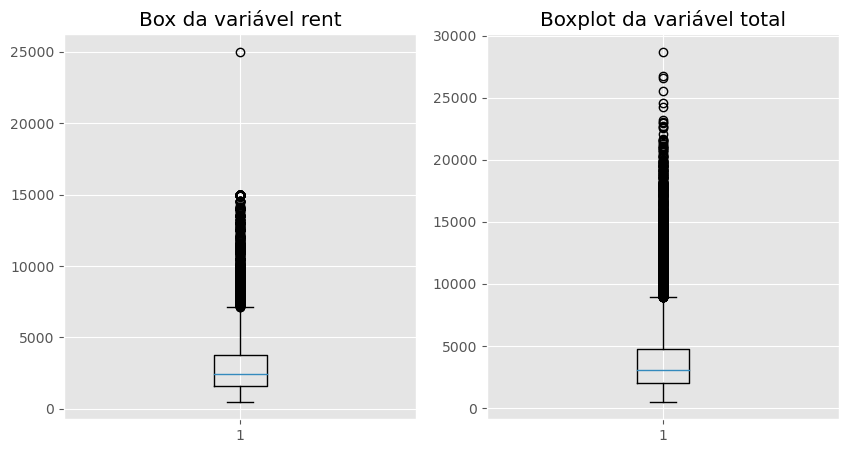

In [6]:
fig, axs = plt.subplots (1, 2, figsize = (10, 5)) # Cria uma figura com 2 subplots

# Cria uma boxplot para a variável 'rent' no primeiro subplot
axs[0].boxplot(aptos['rent'])
axs[0].set_title('Box da variável rent')

# Cria um boxplot para a variável 'total' no segundo subplot
axs[1].boxplot(aptos['total'])
axs[1].set_title('Boxplot da variável total')

# Mostra os gráficos
plt.show()

Ficou muito simples, iremos incrementar

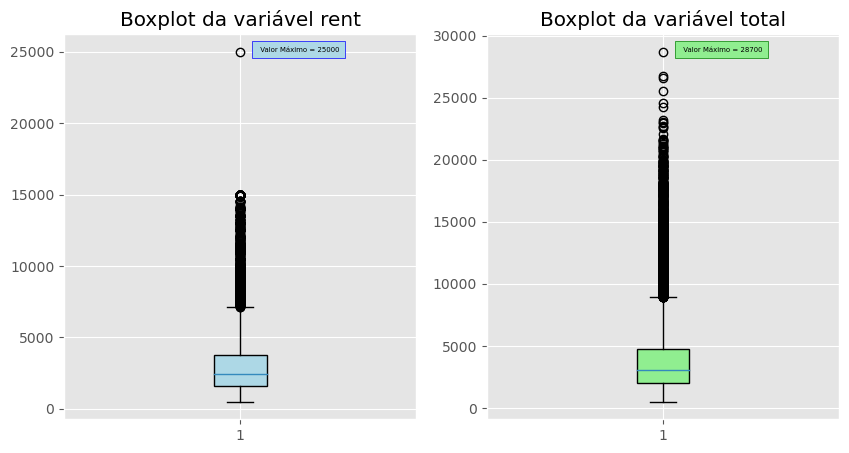

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5)) # Cria uma figura com 2 subplots

# Cria um boxplot para a variável 'rent' no primeiro subplot
bp1 = axs[0].boxplot(aptos['rent'], patch_artist= True)
axs[0].set_title('Boxplot da variável rent')

# Define uma cor do boxplot
bp1['boxes'][0].set_facecolor('lightblue')

# Adiciona a legenda do valor máximo
max_rent = np.max(aptos['rent'])
axs[0].annotate( f' Valor Máximo = {max_rent}',
                xy = (1, max_rent),
                xytext = (1.05, max_rent),
                bbox = dict ( facecolor='lightblue', edgecolor= 'blue'),
                fontsize=5 # modifica a fonte para um tamanho menor
)

# Cria uma boxplot para a variável 'total' no segundo subplot
bp2 = axs[1].boxplot(aptos['total'], patch_artist = True)
axs[1].set_title('Boxplot da variável total')

# Define a cor do boxplot
bp2['boxes'][0].set_facecolor('lightgreen')

# Adiciona a legenda do valor máximo
max_total = np.max(aptos['total']) # pega o valor máximo do campo total
axs[1].annotate( f' Valor Máximo = {max_total}',
                xy = (1, max_total),
                xytext = (1.05, max_total),
                bbox = dict ( facecolor='lightgreen', edgecolor= 'green'),
                fontsize=5 # modifica a fonte para um tamanho menor
)

# Mostra os gráficos
plt.show()

Histogramas: para facilitar a vida dos leitores

Entendendo o Uso do = no Contexto do Jupyter Notebook

Você está absolutamente certo em questionar o uso do sinal de igual (=) nessas linhas do código.

Embora possa parecer estranho à primeira vista, essa é uma característica específica do Jupyter Notebook que facilita a visualização dos resultados.

No código que você compartilhou, os símbolos _ = aparecem antes das linhas onde são feitas chamadas de funções como sns.histplot() e plt.axvline(). Isso é um truque utilizado quando você quer executar uma função ou comando, mas não se preocupa com o valor de retorno (output) da função.

Em Python, o _ é frequentemente usado como uma variável temporária para armazenar resultados intermediários ou valores que não são necessários posteriormente no código. No caso desse código, ele está apenas "ignorando" o valor de retorno das funções, sem armazená-los em nenhuma variável, como por exemplo:

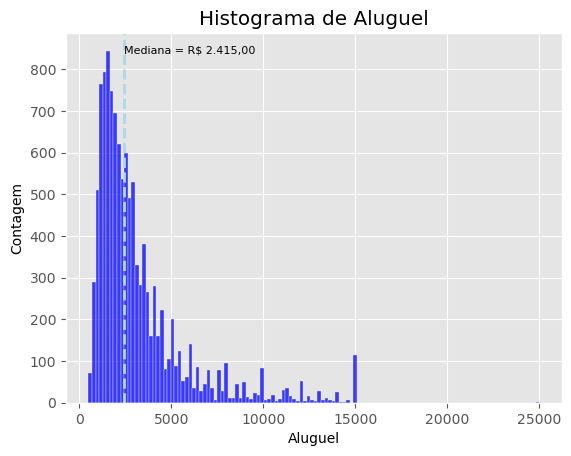

In [8]:
# Calcula a mediana de rend
mediana_rent= aptos.rent.median()

# Formatando a mediana para o formato R$ x,xx

mediana_rent_format= ("R$ {:,.2f}".format(mediana_rent).replace(",","v").replace(".",",").replace("v","."))

 
_ = sns.histplot(aptos.rent, color='blue') #gráfico
_ = plt.axvline(mediana_rent, color ='lightblue', linestyle = 'dashed', linewidth= 2) # linha traçada
_ = plt.title("Histograma de Aluguel") #título
_ = plt.xlabel('Aluguel') #título eixo x
_ = plt.ylabel('Contagem') # titulo eixo y
_ = plt.text ( x = aptos.rent.median(), y= 840, s= f'Mediana = {mediana_rent_format}', fontsize = 8) #legenda
_ = plt.show()


Fazendo o mesmo gráfico no Ploty

In [9]:
mediana_rent = aptos.rent.median()

mediana_rent_format = (
    "R$ {:,.2f}".format(mediana_rent)
    .replace(",","v")
    .replace(".",",")
    .replace("v",".")
)

data = [go.Histogram ( x = aptos.rent,
                      nbinsx= 50,
                      marker= dict(color = 'blue'))]

line = [go.Scatter(x = [mediana_rent, mediana_rent],
                   y= [0, 2200],
                   mode = 'lines',
                   line= dict(color = 'lightblue', dash= 'dash'),
                   showlegend = True,
                   name= f'Mediana = {mediana_rent_format}')]

fig = go.Figure(data=data+line)

fig.update_layout(title_text= 'Histograma do Aluguel',
                  xaxis_title='Aluguel',
                  yaxis_title='Contagem',
                  autosize= False,
                  width= 900,
                  height= 500)
fig.update_yaxes(range =[0, 2200])
fig.show()

* **import plotly.graph_objs as go**: Essa linha importa o módulo graph_objs da biblioteca Plotly como go. O graph_objs contém todas as classes e funções para gerar objetos gráficos. Já havia carregado no início do notebook, mas como eu acabei colocando mais uma vez e já dando a explicação, decidi não apagar. Mas você não precisaria carregar duas vezes, claro rs.
* **mediana_rent = aptos.rent.median():** Essa é bem intuitiva, apenas calculamos a mediana do aluguel (rent) e armazenamos no objeto mediana_rent, pois precisaremos para traçar a linha verticar (rent_median acho que seria um nome melhor).
* **mediana_rent_format = ("R$ {:,.2f}".format(mediana_rent).replace(",", "v")...:** Formatamos a mediana para usar o símbolo do real (`R$`) e duas casas decimais. A sequência de replaces é para alterar o delimitador decimal para a vírgula (o padrão br).
  
* **data = [go.Histogram(x=aptos.rent, nbinsx=50, marker=dict(color='blue'))]:** Esta linha cria um histograma do aluguel, com o número de bins (intervalos / barras de frequência) definido para 50 e a cor do marcador definida como azul.
  
* **line = [go.Scatter(x=[mediana_rent, mediana_rent], y=[0, 2200], mode='lines', line=dict(color='lightblue', dash='dash'), showlegend=True, name=f"Mediana = {mediana_rent_format}")]:** Aqui, um gráfico de dispersão é criado para representar a mediana do aluguel. Isso é feito traçando uma linha vertical na posição da mediana. A linha vai de y=0 até y=2200, tem cor azul claro, e é desenhada em traços.
  
* **fig = go.Figure(data=data+line):** Esta linha cria uma figura Plotly que inclui o histograma e a linha da mediana.
  
* **fig.update_layout(title_text='Histograma do Aluguel', xaxis_title='Aluguel', yaxis_title='Contagem', autosize=False, width=900, height=500):** Aqui, o layout da figura é atualizado para adicionar títulos ao gráfico e aos eixos x e y, e para definir o tamanho do gráfico.
fig.update_yaxes(range=[0, 2200]): Essa linha define o intervalo do eixo y para ir de 0 a 2200.
fig.show(): Finalmente, essa linha exibe o gráfico. O gráfico resultante é um histograma do aluguel com uma linha vertical indicando a mediana do aluguel.

* **estatísticas descritiva**

In [10]:
aptos[['rent','total']].describe().T

,count,mean,std,min,25%,50%,75%,max
rent,11657.0,3250.814789,2650.711557,500.0,1590.0,2415.0,3800.0,25000.0
total,11657.0,4080.030625,3352.480274,509.0,1996.0,3057.0,4774.0,28700.0


In [11]:
import plotly.express as px

fig= px.histogram(aptos, x='type')
fig.update_layout(title='Distribuição dos tipos de Imóveis',
                  xaxis_title='Tipo de Imóvel',
                  yaxis_title='Contagem')

fig.show()

In [12]:
cores_por_tipo= {
    'Studio e kitnet':'#440154',
    'Apartamento': '#482878',
    'Casa em condomínio': '#26828e',
    'Casa':'#31688e'
}

fig= px.histogram(aptos, x='type', color='type', color_discrete_map=cores_por_tipo)
fig.update_layout(title='Distribuição dos tipos de Imóveis',
                  xaxis_title='Tipo de Imóvel',
                  yaxis_title='Contagem')

fig.show()

In [13]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace (
    go.Bar(x = aptos ['bedrooms'].value_counts().index,
           y = aptos ['bedrooms'].value_counts().values,
           name = 'Bedrooms'),
    row =1, col=1
)

fig.add_trace(
    go.Bar(x=aptos['garage'].value_counts().index,
           y=aptos['garage'].value_counts().values,
           name= 'Garage'),
    row =1, col=2
)

fig.update_layout(title = 'Distribuição de Quartos e Garagens')
fig.update_xaxes(tickmode= 'linear')
fig.show()

* **from plotly.subplots import make_subplots:** Importação básica, trouxemos make_subplots do módulo subplots do Plotly. Essa função é usada para criar múltiplos painéis em um único plot, conhecidos como subplots. Em outras palavras, conseguimos criar gráficos lado a lado, ou mesmo um abaixo do outro.

* **fig = make_subplots(rows=1, cols=2):** Essa linha cria um objeto de figura com dois subplots organizados em uma única linha. Você pode pensar nisso como uma grade 1x2 de gráficos vazios.
  
* **fig.add_trace(go.Bar(x=aptos['bedrooms'].value_counts().index, y=aptos['bedrooms'].value_counts().values, name='Bedrooms'),row=1, col=1):** Aqui, um gráfico de barras é adicionado ao primeiro subplot. O eixo x do gráfico de barras é definido como os valores únicos de 'bedrooms' e o eixo y é definido como a contagem desses valores únicos.
  
* **fig.add_trace(go.Bar(x=aptos['garage'].value_counts().index, y = aptos['garage'].value_counts().values, name='Garage'), row=1, col=2):** De maneira semelhante, um gráfico de barras é adicionado ao segundo subplot. O eixo x do gráfico de barras é definido como os valores únicos de 'garage' e o eixo y é definido como a contagem desses valores únicos.
  
* **fig.update_layout(title="Distribuição de Quartos e Garagens"):** Essa linha atualiza o layout da figura para incluir um título. Como você já viu antes, o Plotly tem essa coisa de "atualizar" layout, que é basicamente adicionar informação.
  
* **fig.update_xaxes(tickmode='linear'):** Essa linha é a mais estranha para você até agora, creio eu. Aqui, estamos garantindo que todos os ticks no eixo x sejam exibidos em um intervalo linear. Fiz isso porque o Plotly omite alguns rótulos do eixo, caso contrário. Você pode até rodar sem essa linha e ver o que ocorre, seria interessante para o aprendizado!
  
* **fig.show():** Finalmente, a linha que exibe a figura com os dois subplots.

In [14]:
from tabulate import tabulate

desc= aptos['area'].describe()
desc['var']= aptos['area'].var()
desc['kurt']= aptos['area'].kurtosis()
desc= pd.DataFrame(desc)
print(tabulate(desc, headers='keys', tablefmt= 'psql', showindex = True))

+-------+------------+
|       |       area |
|-------+------------|
| count | 11657      |
| mean  |    84.6557 |
| std   |    74.0205 |
| min   |     0      |
| 25%   |    40      |
| 50%   |    60      |
| 75%   |    96      |
| max   |   580      |
| var   |  5479.04   |
| kurt  |     8.3946 |
+-------+------------+



Aqui está a transcrição do texto da imagem:

Com base nas estatísticas geradas, é possível observar que o tamanho médio da área dos apartamentos em São Paulo é de aproximadamente 84.66 metros quadrados. No entanto, o desvio padrão é bastante alto (74.02 metros quadrados), indicando uma grande variação nos tamanhos dos apartamentos.

Podemos notar que há alguma anomalia nos dados, já que temos um apartamento de 0 metros quadrados, algo impossível de acontecer. Isso já liga um alerta para investigar se os dados estão corretos ou se tivemos algum problema nos inputs.

Podemos ver também que a mediana é de 60 metros quadrados, o que é menor que a média, sugerindo que a distribuição dos tamanhos dos apartamentos é inclinada para a direita. Isso é confirmado pelo alto valor da curtose (8.3946), que indica a presença de outliers no lado direito da distribuição.

Além disso, a diferença entre os valores dos quartis superior e inferior (96 - 40 = 56 metros quadrados) sugere que a maior parte dos apartamentos têm áreas entre 40 e 96 metros quadrados.

Em suma, embora a maioria dos apartamentos pareça ter entre 40 e 96 metros quadrados, há uma quantidade significativa de apartamentos que são muito menores ou muito maiores do que isso, e isso é provável que seja o resultado da presença de outliers.

Falando nisso, como estão suas outras análises, de outros projetos? Você já tem algo em andamento que falta alguma constatação interessante? Pense sempre nisso, o leitor quer insights bacanas, veja o que você consegue extrair dos gráficos e tabelas que não seja tão óbvio.

Enfim, como foi dito acima, temos um problema! Não é possível apartamentos de 0 metros quadrados. Na verdade, mesmo apartamentos de 2 metros quadrados, por exemplo, seria interessante. Sendo assim, vamos verificar quantos apartamentos temos com menos de 10 metros quadrados, onde estão localizados e outras métricas que conseguirmos observar. Primeiro, a contagem:



Enfim, como foi dito acima, temos um problema! Não é possível apartamentos de 0 metros quadrados. Na verdade, mesmo apartamentos de 2 metros quadrados, por exemplo, seria interessante. Sendo assim, vamos verificar quantos apartamentos temos com menos de 10 metros quadrados, onde estão localizados e outras métricas que conseguirmos observar. Primeiro, a contagem:

In [18]:
print(f"Temos {aptos.query('area< 10').shape[0]} com menos de 10 metros quadrados")

Temos 7 com menos de 10 metros quadrados


In [19]:
aptos.query("area < 10")

,address,district,area,bedrooms,garage,type,rent,total
962,Rua Engenheiro Bianor,Butantã,1,1,1,Studio e kitnet,2490,2987
1223,Rua Mussumés,Vila Maria Alta,5,1,0,Casa,570,594
2983,Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
5323,Rua Solidônio Leite,Vila Ivone,2,2,2,Casa,2500,2711
7085,Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351
9898,Rua Visconde de Porto Seguro,Jardim dos Estados,1,4,3,Casa em condomínio,8500,11420
11055,Travessa Santa Filomena,Vila Campo Grande,4,1,0,Casa,630,641


Parece que há algo estranho nesses valores de metragem, poderia ser o caso da área de algumas observações estarem em diferentes unidades de medida, mas isso não explicaria os imóveis de 0 metros. Olhando os preços de aluguel, alguns estão até acima da média e da mediana. Normalmente, poderíamos acionar alguém que mexesse com as bases da empresa, ou um engenheiro de dados, ou um DBA, ou até mesmo nós, cientistas/analistas, poderíamos investigar. Aqui, não existe esta possibilidade. Sendo assim, a opção será excluir essas observações para não trazer muita sujeira para a análise, embora já seja esperado que a gente tenha problemas de qualidade dos dados. Veja abaixo como ficou nosso Jupyter Notebook:

In [20]:
aptos = aptos.query ("area >=10")

Vamos gerar uma descritiva final, para este novo dataset

In [21]:
aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
area,11650.0,84.705408,74.014919,10.0,40.00,60.0,96.00,580.0
bedrooms,11650.0,1.966266,0.931223,0.0,1.00,2.0,3.00,6.0
garage,11650.0,1.060258,1.132394,0.0,0.00,1.0,2.00,6.0
rent,11650.0,3251.095107,2650.771522,500.0,1590.00,2415.0,3800.00,25000.0
total,11650.0,4080.398627,3352.415415,509.0,1996.25,3057.0,4774.75,28700.0


In [24]:
aptos.describe(include=["O"]).T

,count,unique,top,freq
address,11650,5344,Rua da Consolação,49
district,11650,1199,Bela Vista,352
type,11650,4,Apartamento,7193


Como a análise já está ganhando um corpo razoável, podemos começar a responder algumas perguntas e nos aprofundar em alguns campos específicos. Vamos começar pelos bairros! Mas isso vai ficar para a parte 2 dessa análise! Já tem conteúdo para caramba para você ler, isso vai consumir umas boas horas de estudos! Lembrando que estudo sem aplicação não adianta de muita coisa, né?